# Section 6

In [1]:
using PyPlot

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")

rcParams["text.usetex"] = true
rcParams["font.family"] = "serif"
rcParams["font.size"] = 16
rcParams["text.latex.preamble"] = raw"\usepackage{amsmath}"
;

In [2]:
#using Revise
using SparseIR

## Generate IR basis by singular value expansion

In [5]:
# Create kenerl for lambda_ = 100 and beta = 10
# The default value of eps ``cutoff for singular values" is
# set to 2.2e-16.
# In this sample, we compute fewer basis functions.
lambda_ = 100.0
beta = 10.0
wmax = lambda_/beta
basis = FiniteTempBasis(fermion, beta, wmax, 1e-10)

┌ Warning: Basis cutoff is 1.0e-10, which is below sqrt(eps) with eps = 2.220446049250313e-16.
│ Expect singular values and basis functions for large l to have lower precision
│ than the cutoff.
└ @ SparseIR /Users/hiroshi/.julia/packages/SparseIR/ukACp/src/sve.jl:277


FiniteTempBasis{LogisticKernel{Float64}, Float64}: beta=10.0, statistics=fermion, size=30

In [10]:
basis.u[1]([0.0, 0.01])

LoadError: MethodError: no method matching isless(::Float64, ::Vector{Float64})
[0mClosest candidates are:
[0m  isless(::T, [91m::T[39m) where T<:Union{Float16, Float32, Float64} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/float.jl:460
[0m  isless([91m::AbstractVector[39m, ::AbstractVector) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/abstractarray.jl:2532
[0m  isless(::Real, [91m::ColorTypes.AbstractGray[39m) at ~/.julia/packages/ColorTypes/6m8P7/src/operations.jl:32
[0m  ...

## Singular values

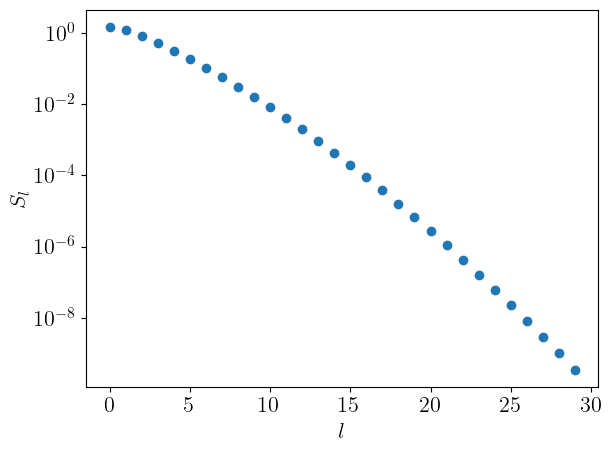

In [6]:
plt.semilogy(basis.s, marker="o", ls="")
plt.xlabel(L"$l$")
plt.ylabel(L"$S_l$")
plt.tight_layout()
plt.savefig("ir_basis_svals_julia.pdf", transparent=true)

## $U_l(\tau)$ and $V_l(\omega)$

In [7]:
fig = plt.figure(figsize=(6,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
axes = [ax1, ax2]

taus = collect(range(0, beta, length=1000))
omegas = collect(range(-wmax, wmax, length=1000))

for l in 1:4
    label = L"$l=" * string(l) * L"$"
    ax1.plot(taus, basis.u[l](taus), label=label)
    ax2.plot(omegas, basis.v[l](omegas), label=label)
end
ax1.set_xlabel(L"$\tau$")
ax2.set_xlabel(L"$\omega$")
ax1.set_ylabel(L"$U_l(\tau)$")
ax2.set_ylabel(L"$V_l(\omega)$")
ax1.set_xlim([0, beta])
ax2.set_xlim([-wmax, wmax])

ax1.legend(loc="best", frameon=false)
ax2.legend(loc="best", frameon=false)
plt.tight_layout()
plt.savefig("ir_basis_functions_julia.pdf", transparent=true)

LoadError: MethodError: no method matching isless(::Float64, ::Vector{Float64})
[0mClosest candidates are:
[0m  isless(::T, [91m::T[39m) where T<:Union{Float16, Float32, Float64} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/float.jl:460
[0m  isless([91m::AbstractVector[39m, ::AbstractVector) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/abstractarray.jl:2532
[0m  isless(::Real, [91m::ColorTypes.AbstractGray[39m) at ~/.julia/packages/ColorTypes/6m8P7/src/operations.jl:32
[0m  ...

In [8]:
# Check orthogonality condition
for i in 1:size(basis), j in i:size(basis)
    println(i, " ", j, " ",
       sum(overlap(basis.u[i], basis.u[j]))
    )
end

1 1 0.9999999999999998
1 2 -6.467265958876034e-17
1 3 -1.0007186052041206e-16
1 4 -5.865533753146579e-17
1 5 -4.0440741033709315e-17
1 6 -5.870954764009007e-17
1 7 -1.49890950346121e-16
1 8 -1.315137235224917e-16
1 9 -9.871660780480518e-17
1 10 -1.470178145890344e-16
1 11 -1.4457835970094202e-16
1 12 -1.8724171518824662e-16
1 13 -1.9136168344369153e-16
1 14 -2.0361316799277773e-16
1 15 -2.1716569514884654e-16
1 16 -1.9060274192295168e-16
1 17 -2.0599841277224584e-16
1 18 -2.0090266256156397e-16
1 19 -1.6924395912498724e-16
1 20 -1.9971004017182992e-16
1 21 -2.2941717969793274e-16
1 22 -1.6132928326584306e-16
1 23 -9.139824314052802e-17
1 24 2.927345865710862e-17
1 25 8.413408858487514e-17
1 26 7.784571598445922e-17
1 27 -1.0625181290357943e-17
1 28 -2.0383000842727483e-17
1 29 -7.112366251504909e-17
1 30 -9.410874857174178e-17
2 2 0.9999999999999998
2 3 3.604972223514302e-18
2 4 2.4740138323403604e-17
2 5 2.531612072753653e-17
2 6 -2.331712297201638e-17
2 7 2.5682038960750386e-17
2 8 -